In [1]:
#importing all libraries 
import pandas as pd
%matplotlib inline
import numpy as np
import openpyxl
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

# Load the xlsx file into a pandas dataframe
df = pd.read_excel('/Users/aishwaryarawat/Downloads/RetailPulseAssignmentData.xlsx')

In [3]:
df.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525460,538171,21931,JUMBO STORAGE BAG SUKI,2,2010-12-09 20:01:00,1.95,17530.0,United Kingdom


### Data Exploration

In [4]:
print(df.shape)

(525461, 8)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [6]:
df.Country.nunique()

40

In [7]:
df.describe()


,Quantity,Price,Customer ID
count,525461.000000,525461.000000,417534.000000
mean,10.337667,4.688834,15360.645478
std,107.424110,146.126914,1680.811316
min,-9600.000000,-53594.360000,12346.000000
25%,1.000000,1.250000,13983.000000
50%,3.000000,2.100000,15311.000000
75%,10.000000,4.210000,16799.000000
max,19152.000000,25111.090000,18287.000000


In [8]:
# checking null values
df.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [9]:
#removing null values from customer id
df = df[pd.notnull(df['Customer ID'])]

In [10]:
#lets check the minimum values in Quantity columns
df.Quantity.min()

-9360

In [11]:
#lets remove the negative quantity
df =df[df['Quantity']>0]
df.shape

(407695, 8)

In [12]:
#lets check unique values for each column
def unique_counts(df):
   for i in df.columns:
       count = df[i].nunique()
       print(i, ": ", count)
unique_counts(df)

Invoice :  19215
StockCode :  4017
Description :  4444
Quantity :  343
InvoiceDate :  18010
Price :  449
Customer ID :  4314
Country :  37


In [13]:
#Lets add a column for total price
df['TotalPrice']= df['Quantity'] * df['Price'] 

## Recency
### Since recency is calculated for a point in time, and the last invoice date is 2011–12–09, we will use 2011–12–### 10 to calculate recency which is customer last purchase


In [14]:
import datetime as dt
NOW = dt.datetime(2011,12,10)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [15]:
#now lets add month,date column 
df['Month']=df['InvoiceDate'].apply(lambda x:x.month)
df['Year']=df['InvoiceDate'].apply(lambda x:x.year)
df=df.sort_values(by=['Year','Month'])

In [16]:
df.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,Month,Year
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,5.90,12,2010
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75,12,2010
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75,12,2010
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,7.50,12,2010
525460,538171,21931,JUMBO STORAGE BAG SUKI,2,2010-12-09 20:01:00,1.95,17530.0,United Kingdom,3.90,12,2010


## RMF customer segmentation 

### RFM (Recency, Frequency, Monetary) analysis is a customer segmentation technique that uses past purchase behaviour to divide customers into groups. RFM helps divide customers into various categories or clusters to identify customers who are more likely to respond to promotions and also for future personalization services.

### RECENCY (R): Days since last purchase

### FREQUENCY (F): Total number of purchases

### MONETARY VALUE (M): Total money this customer spent. We will create those 3 customer attributes for each customer. 

In [17]:
#RMF Table
rfmTable = df.groupby('Customer ID').agg({'InvoiceDate': lambda x: (NOW - x.max()).days, 'Invoice': lambda x: len(x), 'TotalPrice': lambda x: x.sum()})
rfmTable['InvoiceDate'] = rfmTable['InvoiceDate'].astype(int)
rfmTable.rename(columns={'InvoiceDate': 'recency', 
                         'Invoice': 'frequency', 
                         'TotalPrice': 'monetary_value'},
inplace=True)
print(rfmTable.head())

             recency  frequency  monetary_value
Customer ID                                    
12346.0          529         33          372.86
12347.0          367         71         1323.32
12348.0          438         20          222.16
12349.0          407        102         2671.14
12351.0          375         21          300.93


In [18]:
#lets check the detail of first customer
first_customer = df[df['Customer ID']== 12346.0]
first_customer
# total_price = first_customer['Quantity'].sum()
# print(total_price)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,Month,Year
27994,491725,TEST001,This is a test product.,10,2009-12-14 08:34:00,4.50,12346.0,United Kingdom,45.00,12,2009
28251,491742,TEST001,This is a test product.,5,2009-12-14 11:00:00,4.50,12346.0,United Kingdom,22.50,12,2009
28254,491744,TEST001,This is a test product.,5,2009-12-14 11:02:00,4.50,12346.0,United Kingdom,22.50,12,2009
39398,492718,TEST001,This is a test product.,5,2009-12-18 10:47:00,4.50,12346.0,United Kingdom,22.50,12,2009
39411,492722,TEST002,This is a test product.,1,2009-12-18 10:55:00,1.00,12346.0,United Kingdom,1.00,12,2009
45228,493410,TEST001,This is a test product.,5,2010-01-04 09:24:00,4.50,12346.0,United Kingdom,22.50,1,2010
45230,493412,TEST001,This is a test product.,5,2010-01-04 09:53:00,4.50,12346.0,United Kingdom,22.50,1,2010
56117,494450,TEST001,This is a test product.,5,2010-01-14 13:50:00,4.50,12346.0,United Kingdom,22.50,1,2010
66084,495295,TEST001,This is a test product.,5,2010-01-22 13:30:00,4.50,12346.0,United Kingdom,22.50,1,2010
107800,499763,20682,RED SPOTTY CHILDS UMBRELLA,1,2010-03-02 13:08:00,3.25,12346.0,United Kingdom,3.25,3,2010


### The first customer has shopped many times, bought one product at a low quantity(70). The unit price is ### very low; perhaps a clearance sale.

#### RFM segmentation
#### Customers with the lowest recency, highest frequency and monetary amounts considered as top customers.

In [19]:
#Frequency bulma
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

### Split the metrics

### The easiest way to split metrics into segments is by using quartiles.

### This gives us a starting point for the detailed analysis.
### 4 segments are easy to understand and explain.

In [20]:
quantiles = rfmTable.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

segmented_rfm = rfmTable
segmented_rfm['r_quartile'] = segmented_rfm['recency'].apply(RScore, args=('recency',quantiles,))
segmented_rfm['f_quartile'] = segmented_rfm['frequency'].apply(FMScore, args=('frequency',quantiles,))
segmented_rfm['m_quartile'] = segmented_rfm['monetary_value'].apply(FMScore, args=('monetary_value',quantiles,))
segmented_rfm.head()

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile
Customer ID,,,,,,
12346.0,529,33,372.86,4,3,3
12347.0,367,71,1323.32,1,2,2
12348.0,438,20,222.16,3,3,4
12349.0,407,102,2671.14,2,2,1
12351.0,375,21,300.93,1,3,4


In [21]:
segmented_rfm['RFMScore'] = segmented_rfm.r_quartile.map(str) + segmented_rfm.f_quartile.map(str) + segmented_rfm.m_quartile.map(str)
segmented_rfm.head()


,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore
Customer ID,,,,,,,
12346.0,529,33,372.86,4,3,3,433
12347.0,367,71,1323.32,1,2,2,122
12348.0,438,20,222.16,3,3,4,334
12349.0,407,102,2671.14,2,2,1,221
12351.0,375,21,300.93,1,3,4,134


## Who are the top 10 of our best customers????

In [22]:
segmented_rfm[segmented_rfm['RFMScore']=='111'].sort_values('monetary_value', ascending=False).head(10)

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore
Customer ID,,,,,,,
18102.0,365,627,349164.35,1,1,1,111
14646.0,374,1774,248396.50,1,1,1,111
14156.0,371,2648,196566.74,1,1,1,111
14911.0,365,5570,152147.57,1,1,1,111
13694.0,373,957,131443.19,1,1,1,111
17511.0,367,948,84541.17,1,1,1,111
15061.0,367,584,83284.38,1,1,1,111
16684.0,379,441,80489.21,1,1,1,111
16754.0,372,140,65500.07,1,1,1,111


In [23]:
display(segmented_rfm['RFMScore'].unique())
print(segmented_rfm['RFMScore'].nunique())
#There are 61 groups

array(['433', '122', '334', '221', '134', '143', '233', '121', '211',
       '311', '333', '444', '443', '442', '432', '321', '243', '422',
       '332', '144', '244', '322', '222', '132', '343', '111', '234',
       '232', '242', '231', '344', '411', '421', '434', '133', '131',
       '123', '112', '431', '412', '341', '324', '323', '241', '423',
       '224', '312', '342', '212', '223', '142', '441', '331', '424',
       '313', '413', '213', '113', '141', '124', '314'], dtype=object)

61


## Lets classify the customers

In [24]:
segmented_rfm['RFM_Sum'] = segmented_rfm[['r_quartile', 'f_quartile', 'm_quartile']].sum(axis=1)
segmented_rfm.head()

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore,RFM_Sum
Customer ID,,,,,,,,
12346.0,529,33,372.86,4,3,3,433,10
12347.0,367,71,1323.32,1,2,2,122,5
12348.0,438,20,222.16,3,3,4,334,10
12349.0,407,102,2671.14,2,2,1,221,5
12351.0,375,21,300.93,1,3,4,134,8


In [25]:
def classify_customer(df):
    if (df['RFM_Sum'] == 3):
        return 'Top customers'   
    elif (df['RFM_Sum'] == 4):
        return 'Best customers'
    elif (df['RFM_Sum'] == 5):
            return "Good customers"
    elif (df['RFM_Sum'] == 6):
            return "Promising customer"
    elif (df['RFM_Sum'] == 7):
            return "Recent customer"
    elif (df['RFM_Sum'] == 8):
            return "Customer needs attention"
    elif (df['RFM_Sum'] == 9):
            return "Can't lose them"
    elif (df['RFM_Sum'] == 10):
            return "Don't lose them" 
    elif (df['RFM_Sum'] == 11):
            return "We lose them"    
    else:
        return "lost"


In [44]:
segmented_rfm['classify_customer'] = segmented_rfm.apply(classify_customer, axis=1)
segmented_rfm.head()

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore,RFM_Sum,classify_customer
Customer ID,,,,,,,,,
12346.0,529,33,372.86,4,3,3,433,10,Don't lose them
12347.0,367,71,1323.32,1,2,2,122,5,Good customers
12348.0,438,20,222.16,3,3,4,334,10,Don't lose them
12349.0,407,102,2671.14,2,2,1,221,5,Good customers
12351.0,375,21,300.93,1,3,4,134,8,Customer needs attention


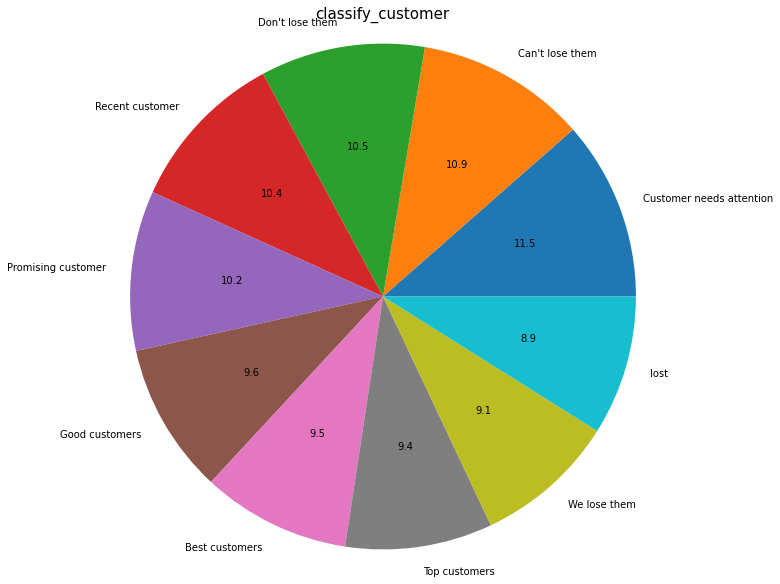

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
segmented_rfm['classify_customer'].value_counts().plot(kind='pie',autopct='%.1f')
plt.title("classify_customer",size=15)
plt.ylabel(" ")
plt.axis('equal') 
plt.show()

## Who are the loyal customers????


Text(0, 0.5, 'Monetary Value')

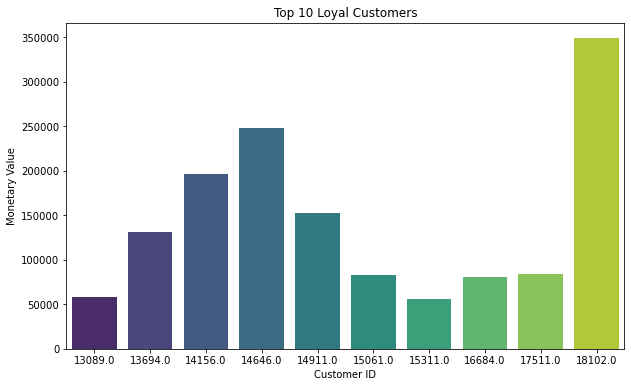

In [50]:
# Create a new column for customer loyalty
segmented_rfm['loyalty'] = 'low'

# Identify loyal customers with high frequency and high monetary value
segmented_rfm.loc[(segmented_rfm['frequency'] >= segmented_rfm['frequency'].quantile(0.9)) & (segmented_rfm['monetary_value'] >= segmented_rfm['monetary_value'].quantile(0.9)), 'loyalty'] = 'high'

# Get the top 10 loyal customers
loyal_customers = segmented_rfm[segmented_rfm['loyalty'] == 'high'].sort_values('monetary_value', ascending=False).head(10)

# Plot a bar chart showing the top 10 loyal customers
plt.figure(figsize=(10,6))
sns.barplot(x=loyal_customers.index, y='monetary_value', data=loyal_customers, palette='viridis')
plt.title('Top 10 Loyal Customers')
plt.xlabel('Customer ID')
plt.ylabel('Monetary Value')


## Who are the lost customers????

Text(0, 0.5, 'Total Purchase Value')

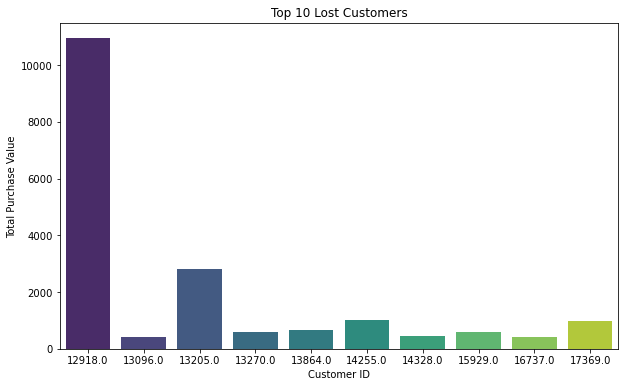

In [59]:
# Find customers who haven't made any purchases in the last 6 months
lost_customers = segmented_rfm[(segmented_rfm['recency'] > 180) & (segmented_rfm['frequency'] == 1)]

# Sort the lost customers by total purchase value
lost_customers_sorted = lost_customers.sort_values('monetary_value', ascending=False).head(10)

# Plot a bar chart of the top 10 lost customers by total purchase value
plt.figure(figsize=(10,6))
sns.barplot(x=lost_customers_sorted.index, y='monetary_value', data=lost_customers_sorted, palette='viridis')
plt.title('Top 10 Lost Customers')
plt.xlabel('Customer ID')
plt.ylabel('Total Purchase Value')

## TOP 10 products which has highest sales???

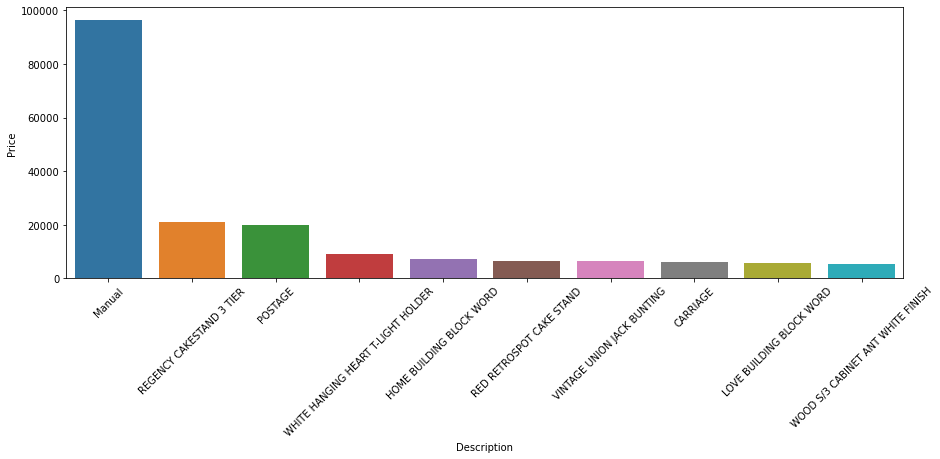

In [31]:
import seaborn as sns
tp = df.groupby('Description',as_index=False)['Quantity','Price'].sum().sort_values(by='Price',ascending=False)
plt.figure(figsize=(15,5))
sns.barplot(data=tp[0:10], x='Description', y='Price')
plt.xticks(rotation=45)
plt.show()

 ## In which Country do we have more customers???

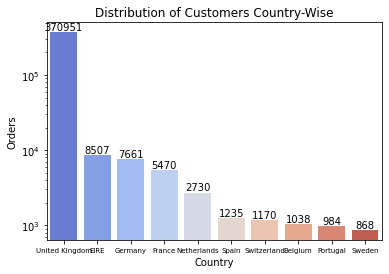

In [32]:
country = df['Country'].value_counts().reset_index(drop = False).head(10)
country.columns = ["Country","Counts"]

#Visualizing Data
ab = sns.barplot(x = 'Country' , y = 'Counts' ,data = country , palette ='coolwarm')

#Data labels
ab.bar_label(ab.containers[0])

#Setting title
plt.title('Distribution of Customers Country-Wise')
plt.ylabel('Orders')
plt.xticks(fontsize = 7)
plt.yscale('log')

 ## In which month have we gained the highest sales???

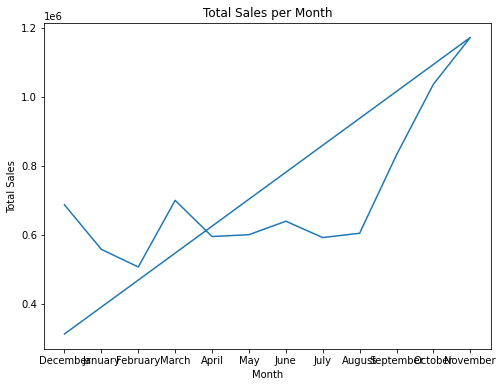

In [34]:

monthly_sales = df.groupby(pd.Grouper(key='InvoiceDate', freq='M'))['TotalPrice'].sum()

# plot the data
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(monthly_sales.index.month_name(), monthly_sales.values)
ax.set_xlabel('Month')
ax.set_ylabel('Total Sales')
ax.set_title('Total Sales per Month')
plt.show()



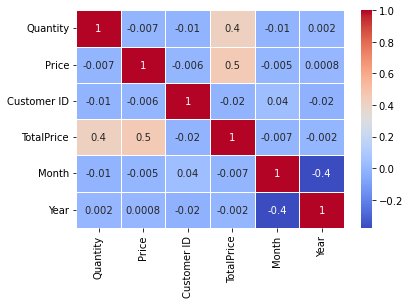

In [35]:
sns.heatmap(df.corr(),annot=True,linewidths=.5,fmt='.1g',cmap= 'coolwarm')
plt.show()

##  Busiest hour in a day ?

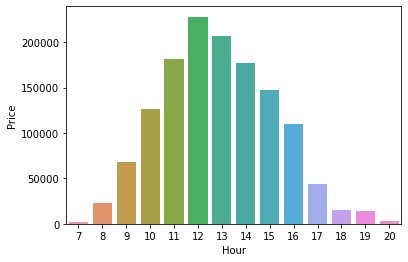

In [36]:
df['Hour'] = (df['InvoiceDate']).dt.hour 
h = df.groupby('Hour',as_index=False)['Quantity','Price'].sum().sort_values(by='Price',ascending=False)
sns.barplot(data=h, x='Hour',y='Price')
plt.show()

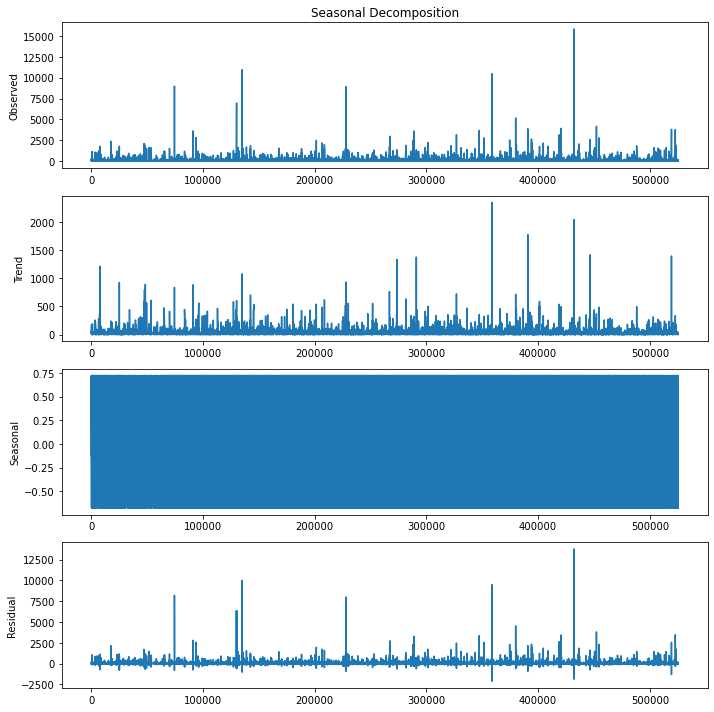

In [37]:

from statsmodels.tsa.seasonal import seasonal_decompose


# Compute seasonal decomposition
decomposition = seasonal_decompose(df['TotalPrice'], period=12)

# Plot seasonal decomposition
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10,10))
decomposition.observed.plot(ax=axes[0], ylabel='Observed', title='Seasonal Decomposition')
decomposition.trend.plot(ax=axes[1], ylabel='Trend')
decomposition.seasonal.plot(ax=axes[2], ylabel='Seasonal')
decomposition.resid.plot(ax=axes[3], ylabel='Residual')
plt.tight_layout()
plt.show()


## Recency vs Frequency

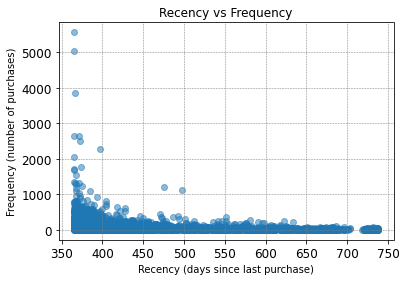

In [40]:
plt.scatter(segmented_rfm['recency'], segmented_rfm['frequency'], alpha=0.5)

# set x and y axis labels
plt.xlabel('Recency (days since last purchase)')
plt.ylabel('Frequency (number of purchases)')

# set title
plt.title('Recency vs Frequency')

# set tick label size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# set grid lines
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# show plot
plt.show()

## which country has the highest sales????

Text(0, 0.5, 'Total Sales')

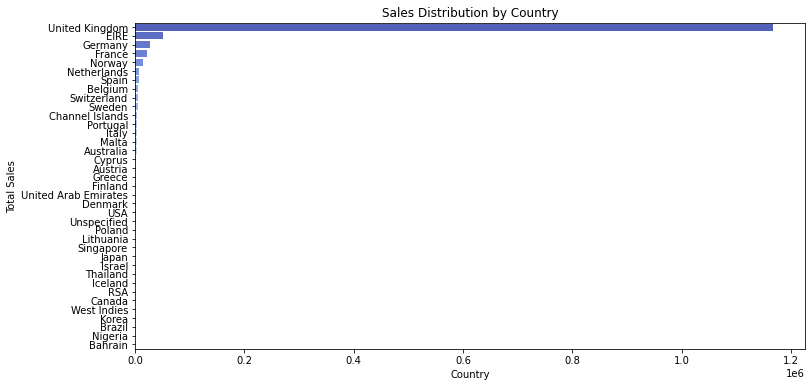

In [43]:
# Get sales distribution by country
country_sales = df.groupby('Country')['Price'].sum().sort_values(ascending=False).reset_index()

# Create bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Price',y='Country', data=country_sales, palette='coolwarm')
plt.title('Sales Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Total Sales')